In [214]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [93]:
files = ['august.csv', 'september.csv', 'october.csv'] 
PATH ='../data/private/csv/fam/'
df = [pd.read_csv(os.path.join(PATH, file)) 
      for file in files]
df = pd.concat(df, sort=False)
print('Total de registros: %s'%df['month'].count())
df.head()

Total de registros: 53160


,time,sysclass,lat,lon,dir,vel,size,ttyyyxx1,ttyyyxx2,ttyyyxx3,...,maxz,meanvil,ttvil,meanprec,maxprec,year,month,day,hour,minute
0,0.0,0.0,-2.47,-61.05,-999.0,0.0,641.0,0.0,0.0,0.0,...,51.62,1.54,985.28,12.48,162.18,2014,8,1,0,0
1,0.2,2.0,-2.51,-61.15,0.0,22.2,493.0,0.0,0.0,0.0,...,49.64,1.00,491.62,8.71,118.85,2014,8,1,0,0
2,0.4,2.0,-2.43,-61.11,270.0,33.3,519.0,0.0,0.0,0.0,...,56.55,1.21,630.50,9.48,350.60,2014,8,1,0,0
3,0.6,3.0,-2.45,-61.09,243.0,24.8,556.0,0.0,0.0,0.0,...,54.00,1.00,556.31,6.41,235.26,2014,8,1,0,0
4,0.8,2.0,-2.37,-61.05,270.0,55.5,711.0,0.0,0.0,0.0,...,46.78,0.79,561.39,4.30,75.94,2014,8,1,0,0


In [94]:
query = '(month == 8 and day >= 27) or (month == 9) or (month == 10 and day <= 7)'
df = df.query(query)

print('Total de registros: %s'%df['month'].count())
df.head()

Total de registros: 26218


,time,sysclass,lat,lon,dir,vel,size,ttyyyxx1,ttyyyxx2,ttyyyxx3,...,maxz,meanvil,ttvil,meanprec,maxprec,year,month,day,hour,minute
12871,0.0,0.0,-2.75,-58.57,-999.0,0.0,13.0,0.0,0.0,0.0,...,22.28,0.18,2.31,0.97,1.18,2014,8,27,2,24
12872,0.2,1.0,-2.73,-58.57,0.0,11.1,30.0,0.0,0.0,0.0,...,28.17,0.30,9.10,1.80,4.16,2014,8,27,2,24
12873,0.0,0.0,-2.73,-58.57,-999.0,0.0,21.0,0.0,0.0,0.0,...,23.01,0.18,3.76,1.02,1.32,2014,8,27,3,0
12874,0.2,1.0,-2.75,-58.57,180.0,11.1,13.0,0.0,0.0,0.0,...,22.28,0.18,2.28,0.97,1.09,2014,8,27,3,0
12875,0.0,0.0,-1.71,-59.63,-999.0,0.0,12.0,0.0,0.0,0.0,...,21.46,0.16,1.96,0.92,0.97,2014,8,27,3,48


In [65]:
# columns = ['ttyyyxx3', 'riverfrac', 'convfrac', \
#            'strafrac', 'meanz', 'maxz', 'meanvil', \
#            'ttvil', 'meanprec', 'maxprec']
columns = ['ttyyyxx3', 'riverfrac', 'convfrac', \
           'ttvil']
X_train, X_test, y_train, y_test = train_test_split(df[columns[1:]], \
                                       df[[columns[0]]], test_size=.2)
dt = DecisionTreeRegressor().fit(X_train, y_train)
feats = {}
for label, value in zip(columns[1:], dt.feature_importances_*100):
    feats[label] = value
feats

{'riverfrac': 12.086078862769915,
 'convfrac': 25.122984798562985,
 'ttvil': 62.7909363386671}

Accuracy: -25.58 (+/- 113.92)


In [77]:
with open('dtfile.dot', 'w') as dotfile:
    export_graphviz(decision_tree=dt, out_file=dotfile, \
                    class_names=columns[0], \
                    feature_names=columns[1:])


In [96]:
labels = []

for i, row in df.iterrows():
    if row['ttyyyxx3'] == 0:
        labels.append(0)
    else:
        labels.append(1)
df['label'] = labels
df.head()

,time,sysclass,lat,lon,dir,vel,size,ttyyyxx1,ttyyyxx2,ttyyyxx3,...,meanvil,ttvil,meanprec,maxprec,year,month,day,hour,minute,label
12871,0.0,0.0,-2.75,-58.57,-999.0,0.0,13.0,0.0,0.0,0.0,...,0.18,2.31,0.97,1.18,2014,8,27,2,24,0
12872,0.2,1.0,-2.73,-58.57,0.0,11.1,30.0,0.0,0.0,0.0,...,0.30,9.10,1.80,4.16,2014,8,27,2,24,0
12873,0.0,0.0,-2.73,-58.57,-999.0,0.0,21.0,0.0,0.0,0.0,...,0.18,3.76,1.02,1.32,2014,8,27,3,0,0
12874,0.2,1.0,-2.75,-58.57,180.0,11.1,13.0,0.0,0.0,0.0,...,0.18,2.28,0.97,1.09,2014,8,27,3,0,0
12875,0.0,0.0,-1.71,-59.63,-999.0,0.0,12.0,0.0,0.0,0.0,...,0.16,1.96,0.92,0.97,2014,8,27,3,48,0


In [234]:
from sklearn.tree import DecisionTreeClassifier

n = 10000
no = df[df['label'] == 0].sample(n)
yes = df[df['label'] == 1].sample(n)

df_ = pd.concat([yes, no]).sample(n)


X_train, X_test, y_train, y_test = train_test_split(df_[columns[1:]], df_[['label']], test_size=.2)

dt = DecisionTreeClassifier().fit(X_train, y_train)

with open('dtfile.dot', 'w') as dotfile:
    export_graphviz(decision_tree=dt, out_file=dotfile, \
                    feature_names=columns[1:], 
                    class_names=['sem raio', 'com raio'])

    
scores = cross_val_score(dt, df[columns[1:]], df[[columns[0]]], cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

fig = go.Figure()

fig.add_trace(
    go.Scatter(y=scores*100, mode='markers', \
               marker=dict(color='green'), 
               name='Acurácia durante aprendizado')
)

fig.add_trace(
    go.Line(y=np.linspace(scores.min()*100, scores.max()*100, len(scores)), \
            x=np.linspace(1, len(scores), len(scores)), opacity=.8, \
            line=dict(color='red', width=5, dash='dot'), name='Taxa de aprendizado')
)

fig.update_layout(
    template='plotly_dark', 
    title='Taxa de aprendizado, acurácia'
)

fig.show()

ValueError: Cannot take a larger sample than population when 'replace=False'

In [201]:
from sklearn.ensemble import RandomForestClassifier

n = 100
no = df[df['label'] == 0].sample(n)
yes = df[df['label'] == 1].sample(n)

df_ = pd.concat([yes, no]).sample(n)


X_train, X_test, y_train, y_test = train_test_split(df_[columns[1:]], df_[['label']], test_size=.2)

rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

scores = cross_val_score(rf, df[columns[1:]], df[[columns[0]]], cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

fig = go.Figure()

fig.add_trace(
    go.Scatter(y=scores*100, mode='markers', \
               marker=dict(color='green'), 
               name='Acurácia durante aprendizado')
)

fig.add_trace(
    go.Line(y=np.linspace(scores.min()*100, scores.max()*100, len(scores)), \
            x=np.linspace(1, len(scores), len(scores)), opacity=.8, \
            line=dict(color='red', width=5, dash='dot'), name='Taxa de aprendizado')
)

fig.update_layout(
    template='plotly_dark', 
    title='Taxa de aprendizado, acurácia'
)

fig.show()

/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/adriano/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning:

The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.

/home/adriano/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/adriano/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/adriano/.local/li

/home/adriano/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/adriano/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/adriano/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/adriano/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



/home/adriano/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/adriano/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/adriano/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/adriano/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



/home/adriano/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/adriano/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/adriano/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.87 (+/- 0.14)


/home/adriano/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [216]:
y_pred = nb.predict(X_test)

Normalized confusion matrix
[[0.95098039 0.04901961]
 [0.68367347 0.31632653]]


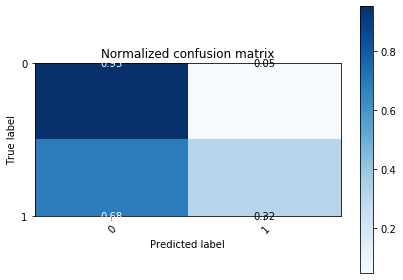

In [236]:
plot_confusion_matrix(y_test, y_pred)

In [235]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes=None,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [0, 1]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax